In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("all_stocks_5yr.csv")
print(df.head())
df.columns.to_list()

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


['date', 'open', 'high', 'low', 'close', 'volume', 'Name']

prepare and reshapestock price data

In [4]:
import pandas as pd

# Convert date column and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# Pivot: rows = date, columns = ticker names, values = close price
price_df = df.pivot(index='date', columns='Name', values='close')

# Handle missing values (forward fill)
price_df = price_df.ffill().dropna()

price_df.head()


Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-12-05,65.83,49.47,101.15,169.64,95.41,85.89,54.79,147.67,167.54,84.83,...,37.32,68.42,82.89,65.61,29.44,67.84,83.10,115.49,50.88,70.85
2017-12-06,65.89,49.61,97.50,169.01,94.40,85.99,54.66,148.27,173.52,85.41,...,37.45,68.39,82.28,65.50,29.64,67.98,83.24,115.78,49.92,70.97
2017-12-07,66.71,50.88,97.61,169.32,94.24,85.93,54.69,148.60,174.61,86.11,...,36.73,69.00,82.55,64.99,29.59,68.38,83.05,114.78,50.47,71.64
2017-12-08,67.38,51.02,100.31,169.37,95.95,86.70,54.64,150.53,173.57,85.52,...,36.87,68.54,82.66,64.90,29.59,68.19,83.32,113.38,50.93,71.88
2017-12-11,67.00,51.30,100.85,172.67,96.47,86.77,54.94,150.69,174.31,85.80,...,36.82,68.38,83.03,65.02,29.59,67.28,82.45,113.51,49.94,71.77


step 2: compute daily returns

In [5]:
returns = price_df.pct_change().dropna()
returns.head()


Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-12-06,0.000911,0.002830,-0.036085,-0.003714,-0.010586,0.001164,-0.002373,0.004063,0.035693,0.006837,...,0.003483,-0.000438,-0.007359,-0.001677,0.006793,0.002064,0.001685,0.002511,-0.018868,0.001694
2017-12-07,0.012445,0.025600,0.001128,0.001834,-0.001695,-0.000698,0.000549,0.002226,0.006282,0.008196,...,-0.019226,0.008919,0.003281,-0.007786,-0.001687,0.005884,-0.002283,-0.008637,0.011018,0.009441
2017-12-08,0.010043,0.002752,0.027661,0.000295,0.018145,0.008961,-0.000914,0.012988,-0.005956,-0.006852,...,0.003812,-0.006667,0.001333,-0.001385,0.000000,-0.002779,0.003251,-0.012197,0.009114,0.003350
2017-12-11,-0.005640,0.005488,0.005383,0.019484,0.005419,0.000807,0.005490,0.001063,0.004263,0.003274,...,-0.001356,-0.002334,0.004476,0.001849,0.000000,-0.013345,-0.010442,0.001147,-0.019438,-0.001530
2017-12-12,0.000896,-0.016179,0.021616,-0.005618,-0.001762,0.012101,0.013833,0.009357,-0.010154,-0.003730,...,0.005703,-0.010237,-0.003252,-0.000461,0.005069,0.003864,-0.005579,0.000264,0.010412,0.006409


step3: portfolio simulation ( Risk,return,Sharpe)

In [6]:
import numpy as np

num_portfolios = 3000
results = []

mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

risk_free_rate = 0  # modify if needed

for _ in range(num_portfolios):
    weights = np.random.random(len(price_df.columns))
    weights /= weights.sum()

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

    results.append([portfolio_volatility, portfolio_return, sharpe])
    
results_df = pd.DataFrame(results, columns=["Risk", "Return", "Sharpe"])
results_df.head()


,Risk,Return,Sharpe
0,0.135089,0.052694,0.390066
1,0.136826,0.081519,0.595784
2,0.135268,0.057224,0.423041
3,0.134503,0.059410,0.441697
4,0.136043,0.084539,0.621412


Step 4: Find minmum risk and maximum sharpe portfolios

In [8]:
max_sharpe = results_df.loc[results_df["Sharpe"].idxmax()]
min_risk = results_df.loc[results_df["Risk"].idxmin()]

print("max sharpe:->",max_sharpe)
print("min risk:->",min_risk)


max sharpe:-> Risk      0.135465
Return    0.122929
Sharpe    0.907464
Name: 956, dtype: float64
min risk:-> Risk      0.128287
Return    0.040437
Sharpe    0.315203
Name: 2592, dtype: float64


Step 5: find efficent frontier plot 

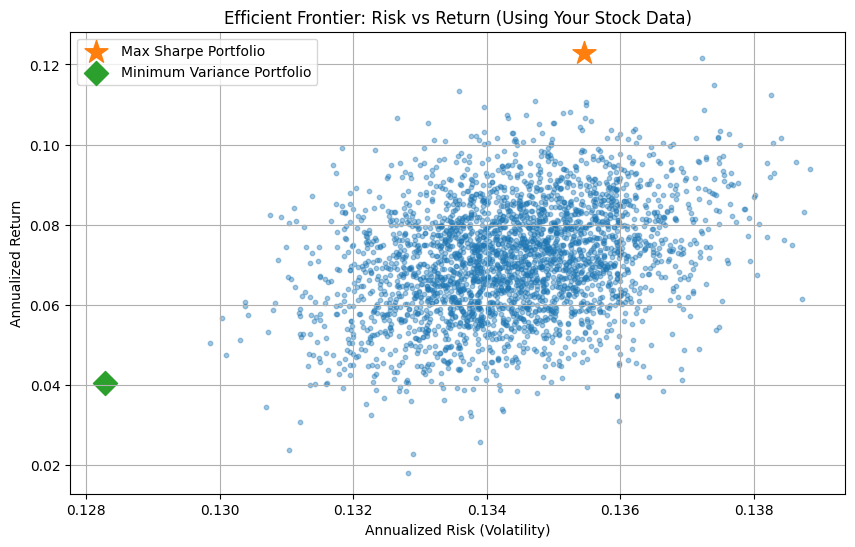

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot all random portfolios
plt.scatter(results_df["Risk"], results_df["Return"], s=10, alpha=0.4)

# Highlight max Sharpe portfolio
plt.scatter(max_sharpe["Risk"], max_sharpe["Return"], 
            marker="*", s=300, label="Max Sharpe Portfolio")

# Highlight min variance portfolio
plt.scatter(min_risk["Risk"], min_risk["Return"], 
            marker="D", s=150, label="Minimum Variance Portfolio")

plt.title("Efficient Frontier: Risk vs Return (Using Your Stock Data)")
plt.xlabel("Annualized Risk (Volatility)")
plt.ylabel("Annualized Return")
plt.legend()
plt.grid(True)
plt.show()


Step 6: correlation heatmap

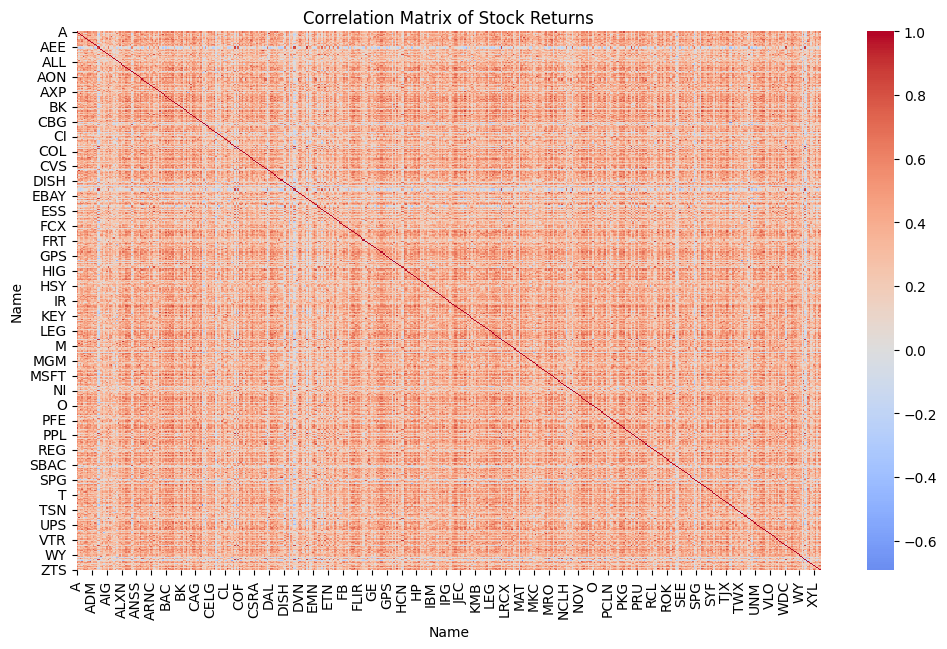

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(returns.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Stock Returns")
plt.show()


step8: stock price and trend chart

<Figure size 1200x700 with 0 Axes>

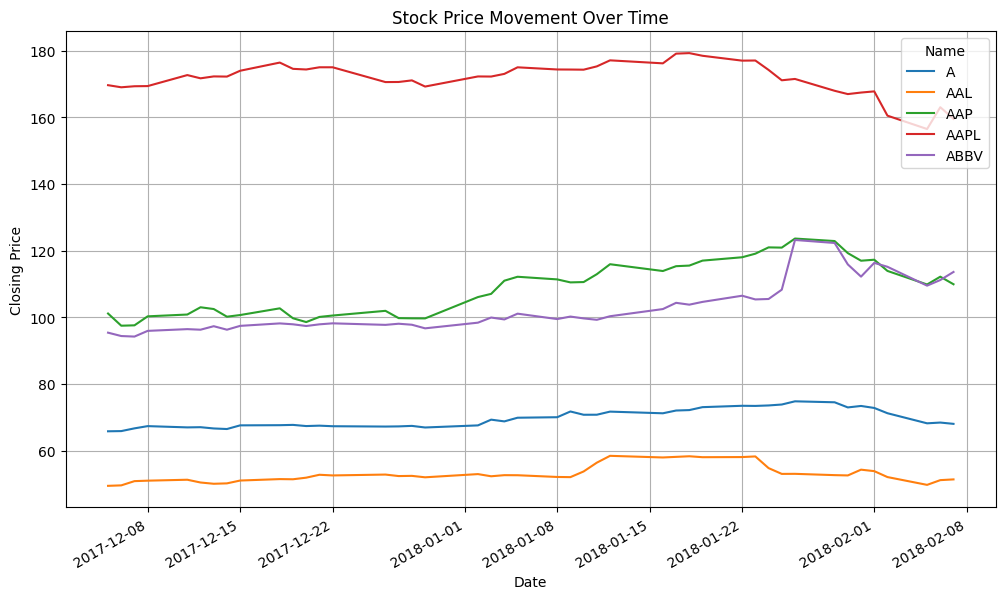

In [12]:
plt.figure(figsize=(12, 7))
price_df.iloc[:, :5].plot(figsize=(12, 7))  # showing first 5 to avoid clutter

plt.title("Stock Price Movement Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()


step 9: Individual stock risk  vs return plot

C:\Users\amitk\AppData\Local\Temp\ipykernel_24752\4037903637.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ticker, (stock_volatility[i], stock_returns[i]))


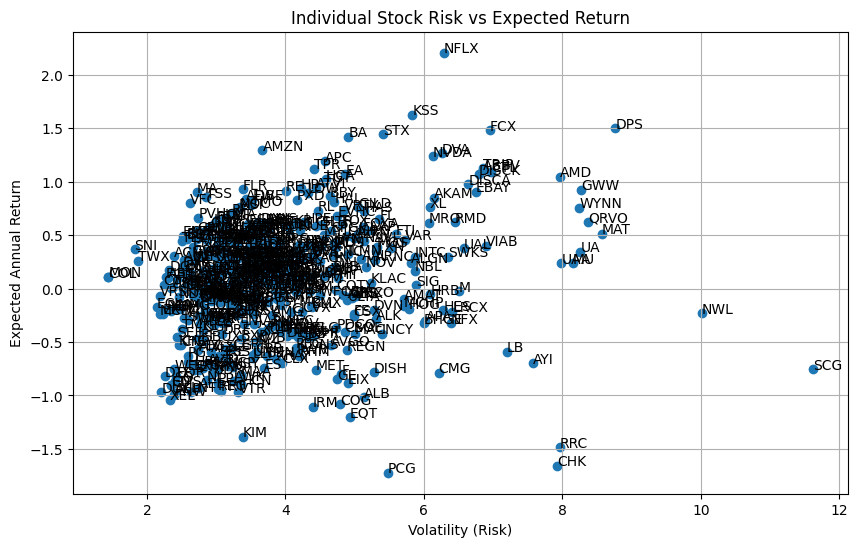

In [13]:
stock_returns = returns.mean() * 252
stock_volatility = returns.std() * 252

plt.figure(figsize=(10,6))
plt.scatter(stock_volatility, stock_returns)

for i, ticker in enumerate(stock_returns.index):
    plt.annotate(ticker, (stock_volatility[i], stock_returns[i]))

plt.title("Individual Stock Risk vs Expected Return")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Annual Return")
plt.grid(True)
plt.show()
